# Power Transforms

Data transforms are intended to remove noise and improve the signal in time series forecasting. It can be very difficult to select a good, or even best, transform for a given prediction problem. There are many transforms to choose from and each has a different mathematical intuition.

### Airline Passengers Dataset


Populating the interactive namespace from numpy and matplotlib


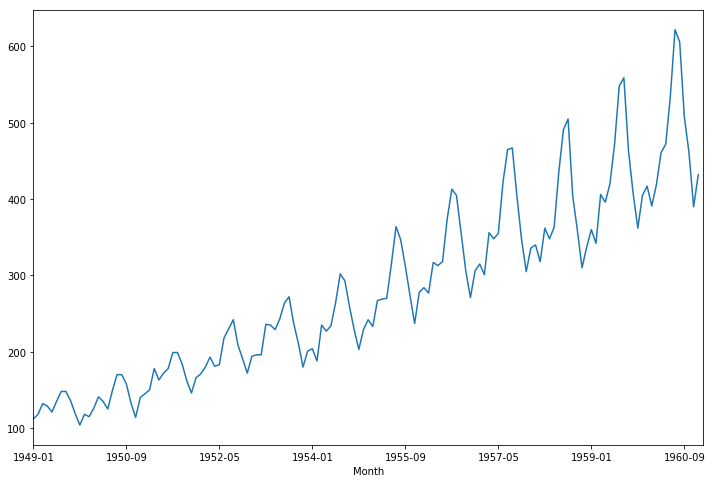

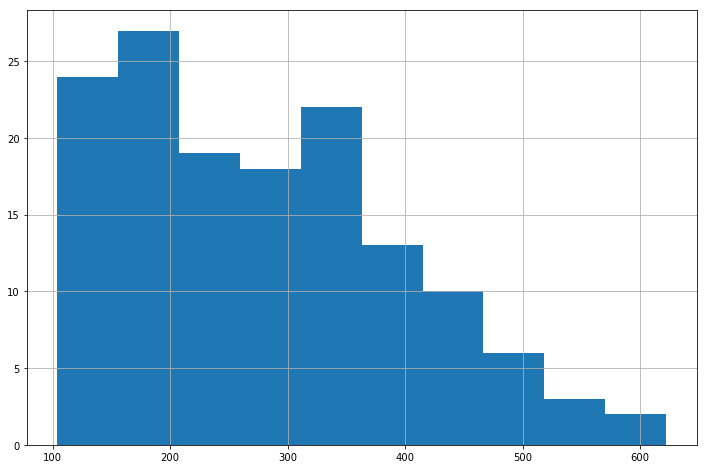

In [25]:
#Load and plot time series

from pandas import read_csv
from matplotlib import pyplot
%pylab inline
pylab.rcParams['figure.figsize'] = (12,8)
    
series = read_csv('airline.csv', header=0, parse_dates=[0], 
                  index_col = 0, squeeze=True)
pyplot.figure(1)
#line plot
series.plot()
pyplot.show()

#histogram
series.hist()
pyplot.show()


The dataset is non-stationary, meaning that the mean and the variance of the observations change over time. This makes it diffcult to model by both classical statistical methods, like ARIMA, and more sophisticated machine learning methods, like neural networks. This is caused by what appears to be both an increasing trend and a seasonality component.

In addition, the amount of change, or the variance, is increasing with time. This is clear when you look at the size of the seasonal component and notice that from one cycle to the next, the amplitude (from bottom to top of the cycle) is increasing.

### Square Root Transformation

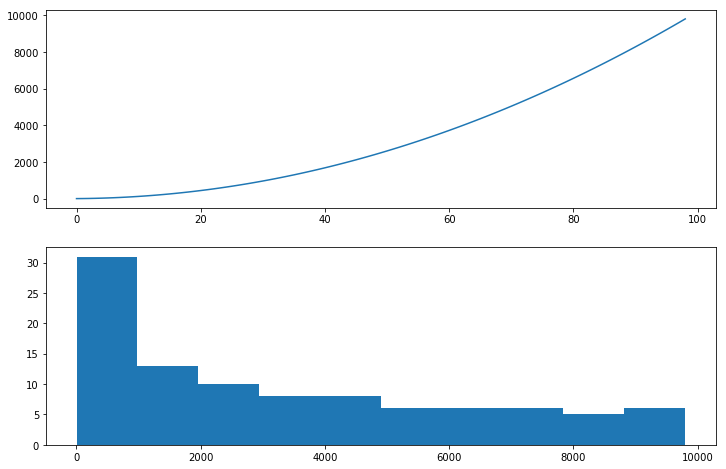

In [26]:
# contrive a quadratic time series
from matplotlib import pyplot
series = [i**2 for i in range(1,100)]
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

If you see a structure like this in your own time series, you may have a quadratic growth trend. This can be removed or made linear by taking the inverse operation of the squaring procedure, which is the square root. Because the example is perfectly quadratic, we would expect the line plot of the transformed data to show a straight line. Because the source of the squared series is linear, we would expect the histogram to show a uniform distribution. The
example below performs a sqrt() transform on the time series and plots the result.

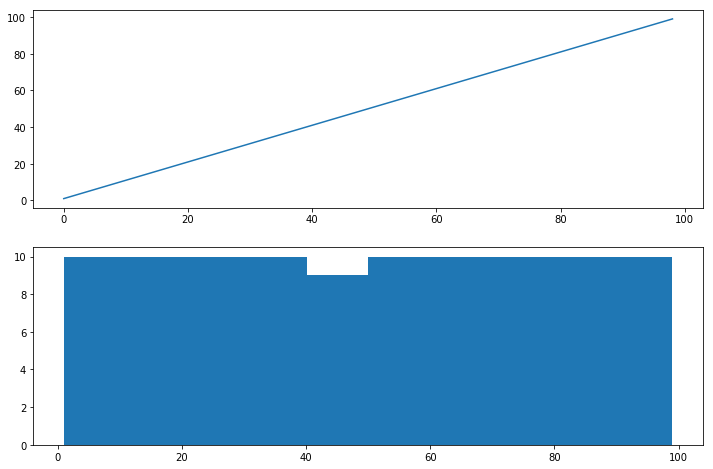

In [27]:
# square root transform a contrived quadratic time series
from matplotlib import pyplot
from numpy import sqrt
series = [i**2 for i in range(1,100)]
# sqrt transform
transform = series = sqrt(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

It is possible that the Airline Passengers dataset shows a quadratic growth. If this is the case, then we could expect a square root transform to reduce the growth trend to be linear and change the distribution of observations to be perhaps nearly Gaussian. The example below performs a square root of the dataset and plots the results.

## Airline Dataset, square root Transform

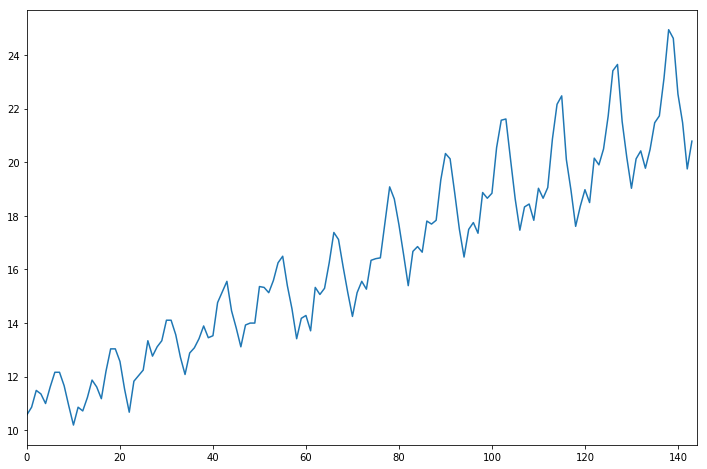

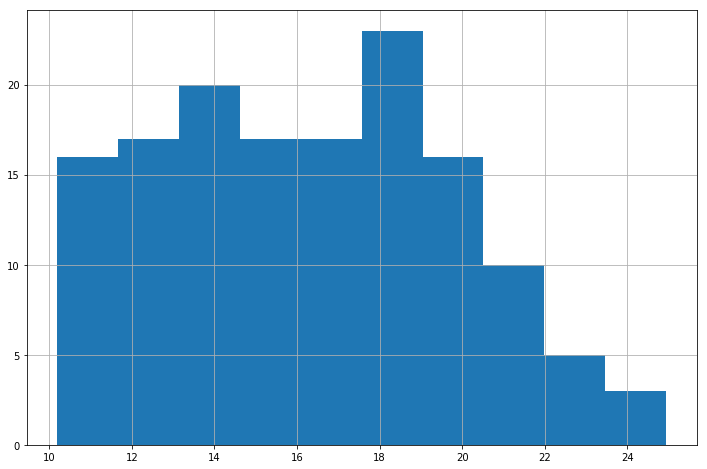

In [32]:
# square root transform a time series
from pandas import Series
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot
series = read_csv('airline.csv', header=0, parse_dates=[0], 
                  index_col = 0, squeeze=True)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = sqrt(dataframe['passengers'])

# line plot
dataframe['passengers'].plot()
pyplot.show()
# histogram
dataframe['passengers'].hist()
pyplot.show()

We can see that the trend was reduced, but was not removed. The line plot still shows an increasing variance from cycle to cycle. The histogram still shows a long tail to the right of the distribution, suggesting an exponential or long-tail distribution.

### Log Transform

A class of more extreme trends are exponential, often graphed as a hockey stick. Time series with an exponential distribution can be made linear by taking the logarithm of the values. This is called a log transform. As with the square and square root case above, we can demonstrate this with a quick example. The code below creates an exponential distribution by raising the numbers from 1 to 99 to the value e, which is the base of the natural logarithms or Euler’s number (2.718...)


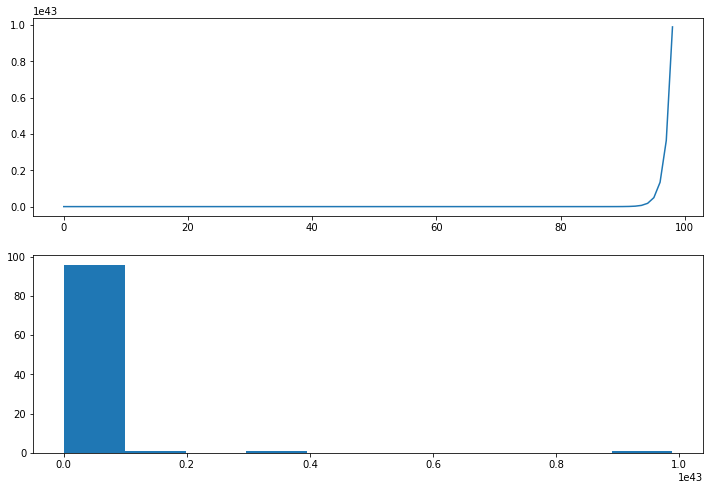

In [33]:
# create and plot an exponential time series
from matplotlib import pyplot
from math import exp
series = [exp(i) for i in range(1,100)]
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

Running the example creates a line plot of the series and a histogram of the distribution of observations. We see an extreme increase on the line graph and an equally extreme long tail distribution on the histogram.

Again, we can transform this series back to linear by taking the natural logarithm of the values. This would make the series linear and the distribution uniform.

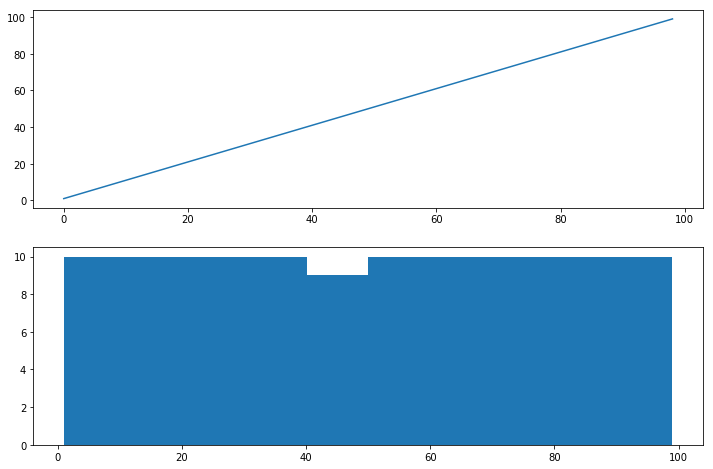

In [34]:
# log transform a contrived exponential time series
from matplotlib import pyplot
from math import exp
from numpy import log
series = [exp(i) for i in range(1,100)]
transform = log(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

Our Airline Passengers dataset has a distribution of this form, but perhaps not this extreme. The example below demonstrates a log transform of the Airline Passengers dataset.

## Airline Dataset, Log Transformation

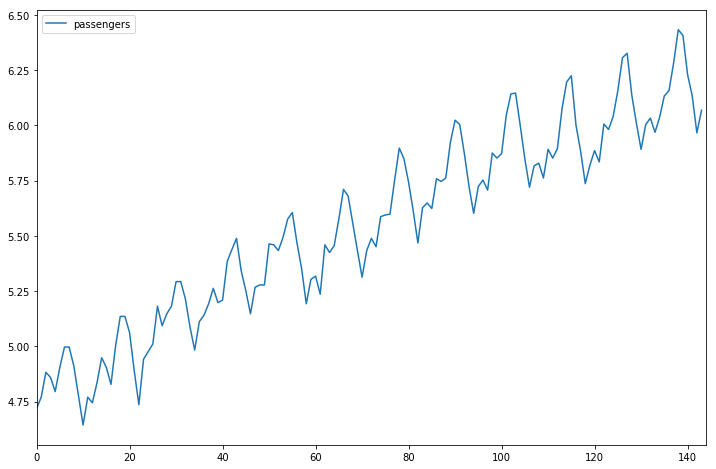

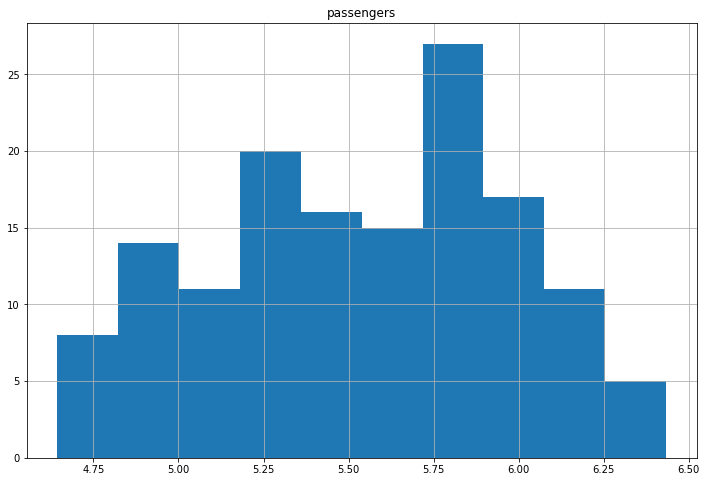

In [37]:
# log transform time series
from pandas import read_csv
from pandas import DataFrame
from numpy import log
from matplotlib import pyplot

series = read_csv('airline.csv', header=0, parse_dates=[0], 
                  index_col = 0, squeeze=True)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = log(dataframe['passengers'])

#lineplot
dataframe.plot()
pyplot.show()

#histogram
dataframe.hist()
pyplot.show()

Running the example results in a trend that does look a lot more linear than the square root transform above. The line plot shows a seemingly linear growth and variance. The histogram also shows a more uniform or squashed Gaussian-like distribution of observations.

Log transforms are popular with time series data as they are effective at removing exponential variance. It is important to note that this operation assumes values are positive and non-zero. It is common to transform observations by adding a fixed constant to ensure all input values meet this requirement.

## Box-Cox Transformation

The square root transform and log transform belong to a class of transforms called power transforms. The Box-Cox transform2 is a configurable data transform method that supports both square root and log transform, as well as a suite of related transforms.

More than that, it can be configured to evaluate a suite of transforms automatically and select a best fit. It can be thought of as a power tool to iron out power-based change in your time series. The resulting series may be more linear and the resulting distribution more Gaussian or Uniform, depending on the underlying process that generated it. The scipy.stats library provides an implementation of the Box-Cox transform. The boxcox() function3 takes an argument, called lambda, that controls the type of transform to perform.
Below are some common values for lambda:

- lambda = -1. is a reciprocal transform.
- lambda = -0.5 is a reciprocal square root transform. lambda = 0.0 is a log transform.
- lambda = 0.5 is a square root transform.
- lambda = 1.0 is no transform.

/anaconda/lib/python3.6/site-packages/scipy/stats/morestats.py:1034: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


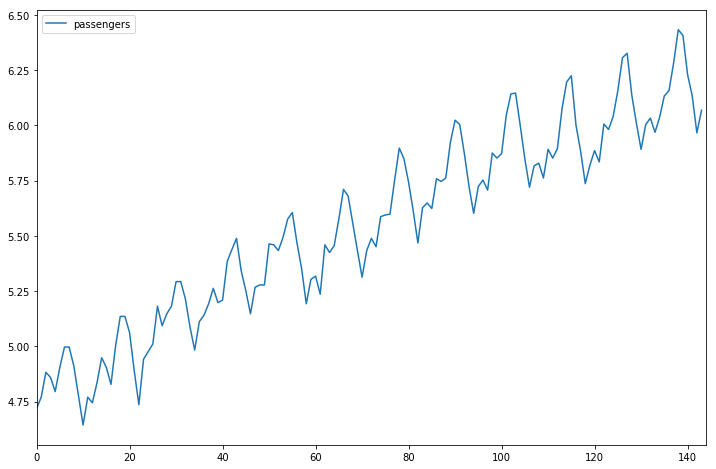

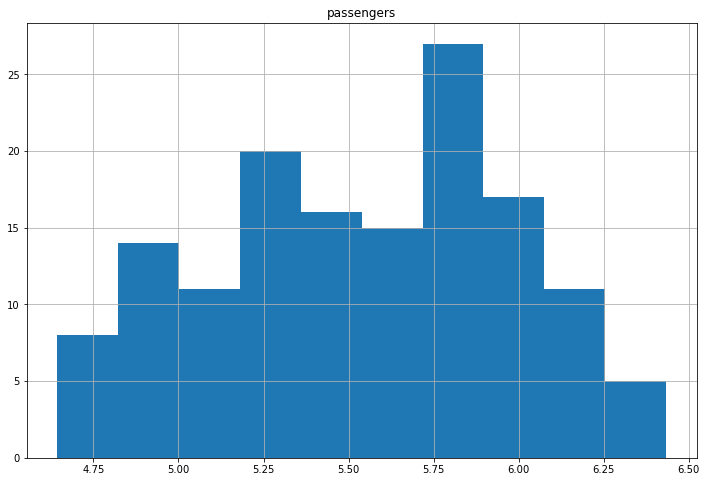

In [39]:
# manually box-cox transform a time series
from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot 

series = read_csv('airline.csv', header=0, parse_dates=[0], 
                  index_col = 0, squeeze=True)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = boxcox(dataframe['passengers'], lmbda=0.0)

#line plot
dataframe.plot()
pyplot.show()

#histogram
dataframe.hist()
pyplot.show()

/anaconda/lib/python3.6/site-packages/scipy/stats/morestats.py:1034: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


Lambda: 8.472136


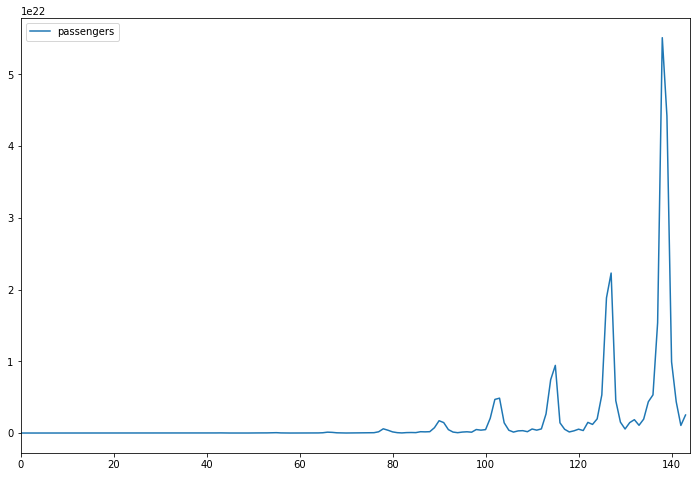

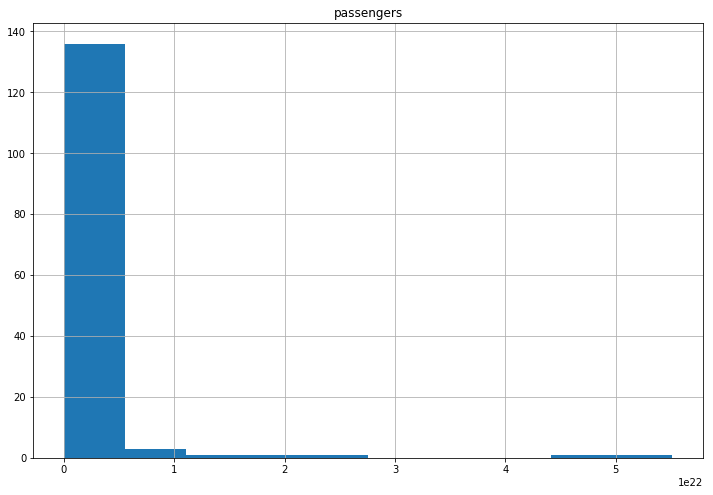

In [51]:
# automatically box-cox transform a time series
from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot

series = read_csv('airline.csv', header=0, parse_dates=[0], 
                  index_col = 0, squeeze=True)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'], lam = boxcox(dataframe['passengers'])
print("Lambda: %f" % lam)

#line plot
dataframe.plot()
pyplot.show()
#histogram
dataframe.hist()
pyplot.show()

## NOT RETURNING EXPECTED RESULTS